In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv('airline-passengers.csv',index_col='month',parse_dates=True)
print(df.head())
print(df.shape)

            total_passengers
month                       
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
(144, 1)


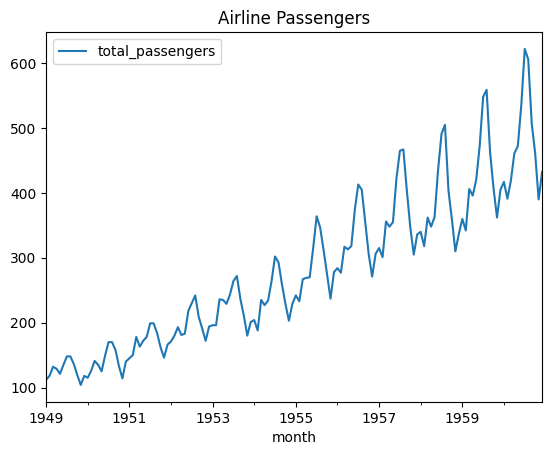

In [7]:
df[['total_passengers']].plot(title='Airline Passengers')
plt.show()

In [9]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

In [10]:
df.index.freq='MS'

In [14]:
train=df[:100]
valid=df[100:130]
test=df[130:]
print(len(train),len(valid),len(test))

100 30 14


In [13]:
def plot(pred,label):
    train['total_passengers'].plot(legend=True,label='Train')
    valid['total_passengers'].plot(legend=True,label='Valid')
    pred.plot(legend=True,label="PREDİCTİON")
    plt.title("Train, Valid and Prediction Test Using" +label)
    plt.show()

In [57]:
def ses_optimizer(train,alphas,step=30):
    best_alpha=None
    best_mse=np.inf
    for alpha in alphas:
        model=SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        pred=model.forecast(step)
        mse=mean_squared_error(valid,pred)
        if  mse<best_mse:
            best_alpha=alpha
            best_mse=mse
        print('Alpha:',round(alpha,2),'MSE:',round(mse,2))
    print('Best Alpha:',round(best_alpha,2),'Best MSE:',round(best_mse,4))
    return best_alpha,best_mse

Alpha: 0.01 MSE: 48633.1
Alpha: 0.11 MSE: 11035.91
Alpha: 0.21 MSE: 9781.77
Alpha: 0.31 MSE: 9390.68
Alpha: 0.41 MSE: 8934.58
Alpha: 0.51 MSE: 8446.31
Alpha: 0.61 MSE: 8028.71
Alpha: 0.71 MSE: 7726.14
Alpha: 0.81 MSE: 7542.13
Alpha: 0.91 MSE: 7470.15
Best Alpha: 0.91 Best MSE: 7470.1478


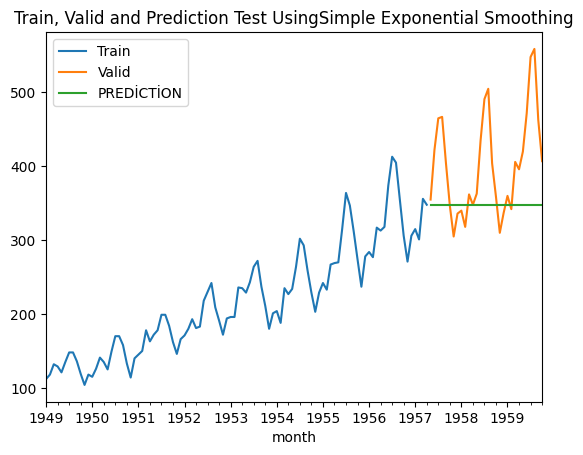

In [58]:
alphas=np.arange(0.01,1,0.10)
best_alpha,best_mse=ses_optimizer(train['total_passengers'],alphas,30)
ses_model=SimpleExpSmoothing(train['total_passengers']).fit(smoothing_level=best_alpha)
pred=ses_model.forecast(30)
plot(pred,'Simple Exponential Smoothing')

In [59]:
def des_optimizer(train,alphas,betas,step=30):
    best_alpha=None
    best_beta=None
    best_mse=np.inf
    for alpha,beta in itertools.product(alphas,betas):
        model=ExponentialSmoothing(train,trend='add').fit(smoothing_level=alpha,smoothing_slope=beta)
        pred=model.forecast(step)
        mse=mean_squared_error(valid,pred)
        if mse<best_mse:
            best_alpha=alpha
            best_beta=beta
            best_mse=mse
        print('Alpha:',round(alpha,2),'Beta:',round(beta,2),'MSE:',round(mse,2))
    print('Best Alpha:',round(best_alpha,2),'Best Beta:',round(best_beta,2),'Best MSE:',round(best_mse,4))
    return best_alpha,best_beta,best_mse

Alpha: 0.01 Beta: 0.01 MSE: 5099.25
Alpha: 0.01 Beta: 0.11 MSE: 5053.89
Alpha: 0.01 Beta: 0.21 MSE: 4493.59
Alpha: 0.01 Beta: 0.31 MSE: 4227.56
Alpha: 0.01 Beta: 0.41 MSE: 4158.96
Alpha: 0.01 Beta: 0.51 MSE: 4141.61
Alpha: 0.01 Beta: 0.61 MSE: 4164.65
Alpha: 0.01 Beta: 0.71 MSE: 4239.15
Alpha: 0.01 Beta: 0.81 MSE: 4361.24
Alpha: 0.01 Beta: 0.91 MSE: 4524.05
Alpha: 0.11 Beta: 0.01 MSE: 4711.53
Alpha: 0.11 Beta: 0.11 MSE: 4200.05
Alpha: 0.11 Beta: 0.21 MSE: 5818.87
Alpha: 0.11 Beta: 0.31 MSE: 11142.7
Alpha: 0.11 Beta: 0.41 MSE: 16693.91
Alpha: 0.11 Beta: 0.51 MSE: 20620.82
Alpha: 0.11 Beta: 0.61 MSE: 26159.93
Alpha: 0.11 Beta: 0.71 MSE: 36914.07
Alpha: 0.11 Beta: 0.81 MSE: 52820.39
Alpha: 0.11 Beta: 0.91 MSE: 70931.12
Alpha: 0.21 Beta: 0.01 MSE: 4870.66
Alpha: 0.21 Beta: 0.11 MSE: 5690.51
Alpha: 0.21 Beta: 0.21 MSE: 11074.79
Alpha: 0.21 Beta: 0.31 MSE: 18311.9
Alpha: 0.21 Beta: 0.41 MSE: 27052.72
Alpha: 0.21 Beta: 0.51 MSE: 35896.1
Alpha: 0.21 Beta: 0.61 MSE: 40872.63
Alpha: 0.21 Beta: 0

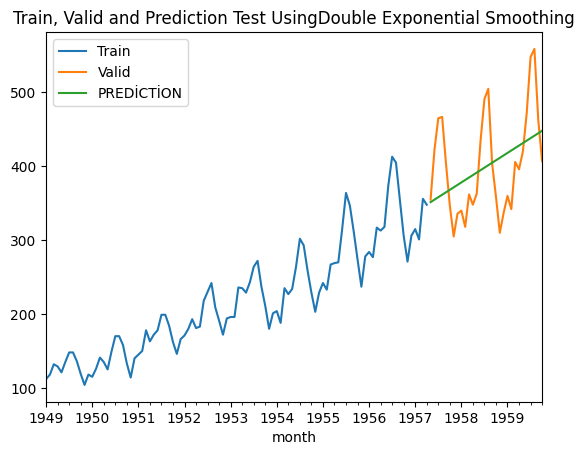

In [60]:
alphas=np.arange(0.01,1,0.10)
betas=np.arange(0.01,1,0.10)
best_alpha,best_beta,best_mse=des_optimizer(train['total_passengers'],alphas,betas,30)
des_model=ExponentialSmoothing(train,trend='add').fit(smoothing_level=best_alpha,smoothing_slope=best_beta)
pred=des_model.forecast(30)
plot(pred,'Double Exponential Smoothing')

In [31]:
def tes_optimizer(train,abg,step=30):
    best_alpha=None
    best_beta=None
    best_gamma=None
    best_mse=np.inf
    for alpha,beta,gamma in abg:
        model=ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)
        pred=model.forecast(step)
        mse=mean_squared_error(valid,pred)
        if mse<best_mse:
            best_alpha=alpha
            best_beta=beta
            best_gamma=gamma
            best_mse=mse
        print('Alpha:',round(alpha,2),'Beta:',round(beta,2),'Gamma:',round(gamma,2),'MSE:',round(mse,2))
    print('Best Alpha:',round(best_alpha,2),'Best Beta:',round(best_beta,2),'Best Gamma:',round(best_gamma,2),'Best MSE:',round(best_mse,4))
    return best_alpha,best_beta,best_gamma,best_mse

Alpha: 0.1 Beta: 0.1 Gamma: 0.1 MSE: 1476.74
Alpha: 0.1 Beta: 0.1 Gamma: 0.3 MSE: 1038.99
Alpha: 0.1 Beta: 0.1 Gamma: 0.5 MSE: 755.1
Alpha: 0.1 Beta: 0.1 Gamma: 0.7 MSE: 606.12
Alpha: 0.1 Beta: 0.1 Gamma: 0.9 MSE: 518.52
Alpha: 0.1 Beta: 0.3 Gamma: 0.1 MSE: 3034.47
Alpha: 0.1 Beta: 0.3 Gamma: 0.3 MSE: 1840.55
Alpha: 0.1 Beta: 0.3 Gamma: 0.5 MSE: 1033.49
Alpha: 0.1 Beta: 0.3 Gamma: 0.7 MSE: 717.57
Alpha: 0.1 Beta: 0.3 Gamma: 0.9 MSE: 630.82
Alpha: 0.1 Beta: 0.5 Gamma: 0.1 MSE: 5811.79
Alpha: 0.1 Beta: 0.5 Gamma: 0.3 MSE: 2706.04
Alpha: 0.1 Beta: 0.5 Gamma: 0.5 MSE: 1463.86
Alpha: 0.1 Beta: 0.5 Gamma: 0.7 MSE: 1771.94
Alpha: 0.1 Beta: 0.5 Gamma: 0.9 MSE: 3666.87
Alpha: 0.1 Beta: 0.7 Gamma: 0.1 MSE: 8360.71
Alpha: 0.1 Beta: 0.7 Gamma: 0.3 MSE: 4995.41
Alpha: 0.1 Beta: 0.7 Gamma: 0.5 MSE: 4279.79
Alpha: 0.1 Beta: 0.7 Gamma: 0.7 MSE: 6013.0
Alpha: 0.1 Beta: 0.7 Gamma: 0.9 MSE: 4476.15
Alpha: 0.1 Beta: 0.9 Gamma: 0.1 MSE: 19188.3
Alpha: 0.1 Beta: 0.9 Gamma: 0.3 MSE: 8429.29
Alpha: 0.1 Beta: 

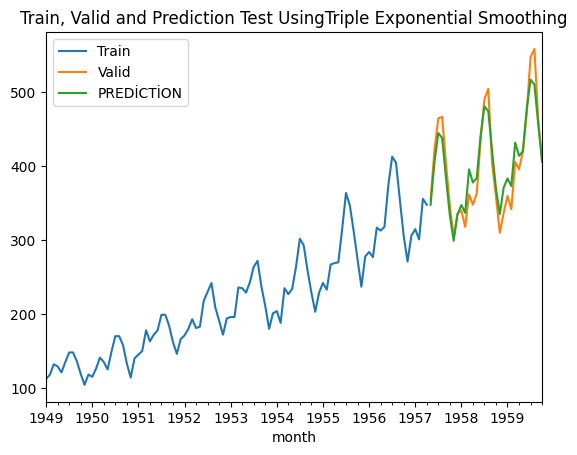

In [32]:
alphas=betas=gammas=np.arange(0.10,1,0.20)
abg=list(itertools.product(alphas,betas,gammas))
best_alpha,best_beta,best_gamma,best_mse=tes_optimizer(train['total_passengers'],abg,30)
tes_model=ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit(smoothing_level=best_alpha,smoothing_slope=best_beta,smoothing_seasonal=best_gamma)
pred=tes_model.forecast(30)
plot(pred,'Triple Exponential Smoothing')

In [64]:
def arima_optimizer_aic(train,pdq,step=30):
    best_pdq=None
    best_aic=np.inf
    for param in pdq:
        try:
            model=ARIMA(train,order=param).fit()
            aic=model.aic
            if aic<best_aic:
                best_pdq=param
                best_aic=aic
            print('PDQ:',param,'AIC:',round(aic,2))
        except:
            print('Error:',param)
            continue
    print('Best PDQ:',best_pdq,'Best AIC:',round(best_aic,4))
    return best_pdq,best_aic

PDQ: (0, 0, 0) AIC: 1148.19
PDQ: (0, 0, 1) AIC: 1033.38
PDQ: (0, 1, 0) AIC: 908.78
PDQ: (0, 1, 1) AIC: 903.55
PDQ: (1, 0, 0) AIC: 923.02
PDQ: (1, 0, 1) AIC: 915.85
PDQ: (1, 1, 0) AIC: 906.03
PDQ: (1, 1, 1) AIC: 898.91
Best PDQ: (1, 1, 1) Best AIC: 898.9106


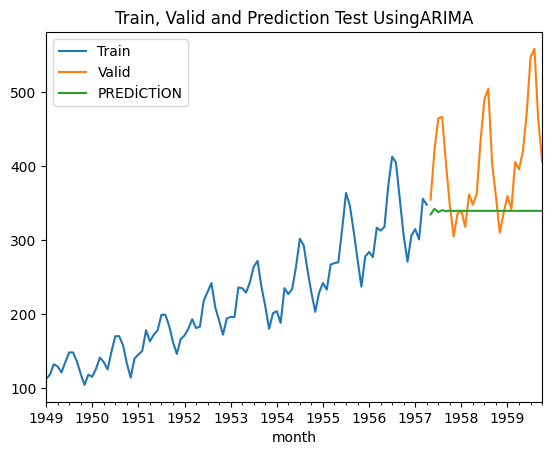

In [65]:
# Define the range for p, d, q
p = d = q = range(0, 2)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Find the best (p, d, q) combination based on AIC
best_pdq, best_aic = arima_optimizer_aic(train['total_passengers'], pdq, 30)

# Fit the ARIMA model with the best (p, d, q) combination
arima_model = ARIMA(train['total_passengers'], order=best_pdq).fit()

# Forecast the next 30 periods
pred = arima_model.forecast(30)

# Plot the forecasted values
plot(pred, 'ARIMA')

In [62]:
def sarima_optimizer_mae(train,pdq,seasonal_pdq,step=30):
    best_pdq=None
    best_seasonal_pdq=None
    best_mse=np.inf
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model1=SARIMAX(train,order=param,seasonal_order=param_seasonal)
                model=model1.fit(display=0)
                pred_test=model.get_forecast(step)
                pred=pred_test.predicted_mean
                mse=mean_squared_error(valid,pred)
                if mse<best_mse:
                    best_pdq=param
                    best_seasonal_pdq=param_seasonal
                    best_mse=mse
                print('Sarıma{}x{} - MSE:{}'.format(param,param_seasonal,mse))
            except:
                print('Error:',param)
                continue
    print('Best PDQ:',best_pdq,'Best Seasonal PDQ:',best_seasonal_pdq,'Best MSE:',round(best_mse,4))
    return best_pdq,best_seasonal_pdq

In [39]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

Sarıma(0, 0, 0)x(0, 0, 0, 12) - MSE:165863.66666666666
Sarıma(0, 0, 0)x(0, 0, 1, 12) - MSE:126706.77480981224
Sarıma(0, 0, 0)x(0, 1, 0, 12) - MSE:4638.5
Sarıma(0, 0, 0)x(0, 1, 1, 12) - MSE:3325.719872345069
Sarıma(0, 0, 0)x(1, 0, 0, 12) - MSE:5405.5289626813965
Sarıma(0, 0, 0)x(1, 0, 1, 12) - MSE:4127.087522346789
Sarıma(0, 0, 0)x(1, 1, 0, 12) - MSE:387.8395852943875
Sarıma(0, 0, 0)x(1, 1, 1, 12) - MSE:251.61215444584158
Sarıma(0, 0, 1)x(0, 0, 0, 12) - MSE:162965.3310594476
Sarıma(0, 0, 1)x(0, 0, 1, 12) - MSE:123628.89906490229
Sarıma(0, 0, 1)x(0, 1, 0, 12) - MSE:4543.462936398941
Sarıma(0, 0, 1)x(0, 1, 1, 12) - MSE:3328.1723833406863
Sarıma(0, 0, 1)x(1, 0, 0, 12) - MSE:5818.492722599663
Sarıma(0, 0, 1)x(1, 0, 1, 12) - MSE:5201.913218699506
Sarıma(0, 0, 1)x(1, 1, 0, 12) - MSE:785.7387326498159
Sarıma(0, 0, 1)x(1, 1, 1, 12) - MSE:316.20276879814804
Sarıma(0, 1, 0)x(0, 0, 0, 12) - MSE:7500.466666666666
Sarıma(0, 1, 0)x(0, 0, 1, 12) - MSE:4286.705274558647
Sarıma(0, 1, 0)x(0, 1, 0, 12) - 

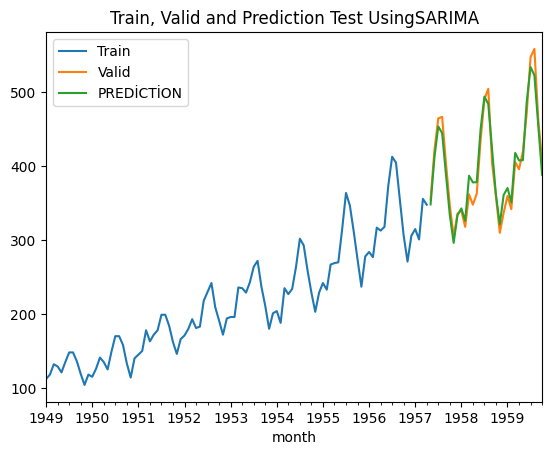

In [63]:
best_pdq, best_seasonal_pdq = sarima_optimizer_mae(train['total_passengers'], pdq, seasonal_pdq, 30)
sarıma_model1=SARIMAX(train['total_passengers'],order=best_pdq,seasonal_order=best_seasonal_pdq)
sarıma_model=sarıma_model1.fit(display=0)
pred_test=sarıma_model.get_forecast(30)
pred=pred_test.predicted_mean
plot(pred,'SARIMA') 


In [48]:
df_test=df[:130]
print(df_test)


            total_passengers
month                       
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
...                      ...
1959-06-01               472
1959-07-01               548
1959-08-01               559
1959-09-01               463
1959-10-01               407

[130 rows x 1 columns]


In [67]:
final_model=SARIMAX(df_test,order=best_pdq,seasonal_order=best_seasonal_pdq)
sarima_final_model=final_model.fit(display=0)   
forecast=sarima_final_model.get_forecast(14)
pred=forecast.predicted_mean
print(pred)
mae=mean_squared_error(test,pred)
print('MAE:',round(mae,4))

1959-11-01    359.653321
1959-12-01    384.918487
1960-01-01    405.920302
1960-02-01    387.399907
1960-03-01    447.639031
1960-04-01    435.857587
1960-05-01    459.919369
1960-06-01    517.473046
1960-07-01    592.145549
1960-08-01    604.263749
1960-09-01    505.260141
1960-10-01    450.596977
1960-11-01    404.250789
1960-12-01    429.849986
Freq: MS, Name: predicted_mean, dtype: float64
MAE: 261.979


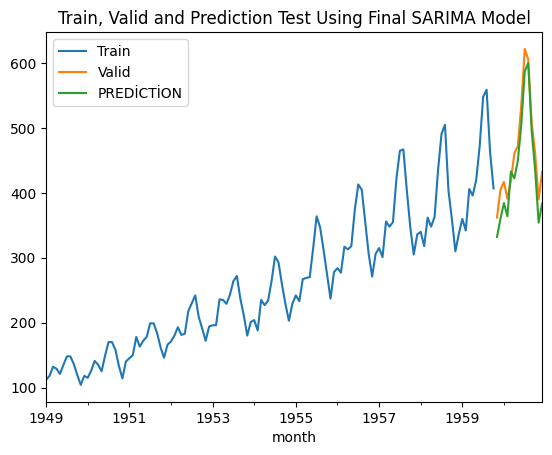

In [51]:
df_test['total_passengers'].plot(legend=True,label='Train')
test['total_passengers'].plot(legend=True,label='Valid')
pred.plot(legend=True,label="PREDİCTİON")
plt.title("Train, Valid and Prediction Test Using Final SARIMA Model")
plt.show()

In [ ]:
"""
SES = Best Alpha: 0.91 Best MSE: 7470.1478
DES = Best Alpha: 0.81 Best Beta: 0.11 Best MSE: 4121.0503
TES = Best Alpha: 0.3 Best Beta: 0.5 Best Gamma: 0.9 Best MSE: 472.9093
ARIMA = Best PDQ: (1, 1, 1) Best AIC: 898.9106
SARIMA = Best PDQ: (0, 0, 0) Best Seasonal PDQ: (1, 1, 1, 12) Best MSE: 251.6122
TEST SARİMA = MAE: 261.979
"""